### 과제
- 데이터셋 : scikit-learn의 load_diabetes활용
- 학습방법 : 지도학습 >  회귀
- 알고리즘 : KNNRegressor
- 목적 : 복습

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [4]:
data, target = load_diabetes(return_X_y=True,as_frame=True,scaled=False)

In [5]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [6]:
target1 = target.to_frame()
target1

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [7]:
data_df = pd.concat([data,target1],axis=1, join='inner')

In [8]:
data_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [9]:
corr_matrix = data_df.corr()
# target과 연관선이 높은 항목 bmi, bp, s5, s3
# target은 glucose, feature은 bmi,s5로 결정

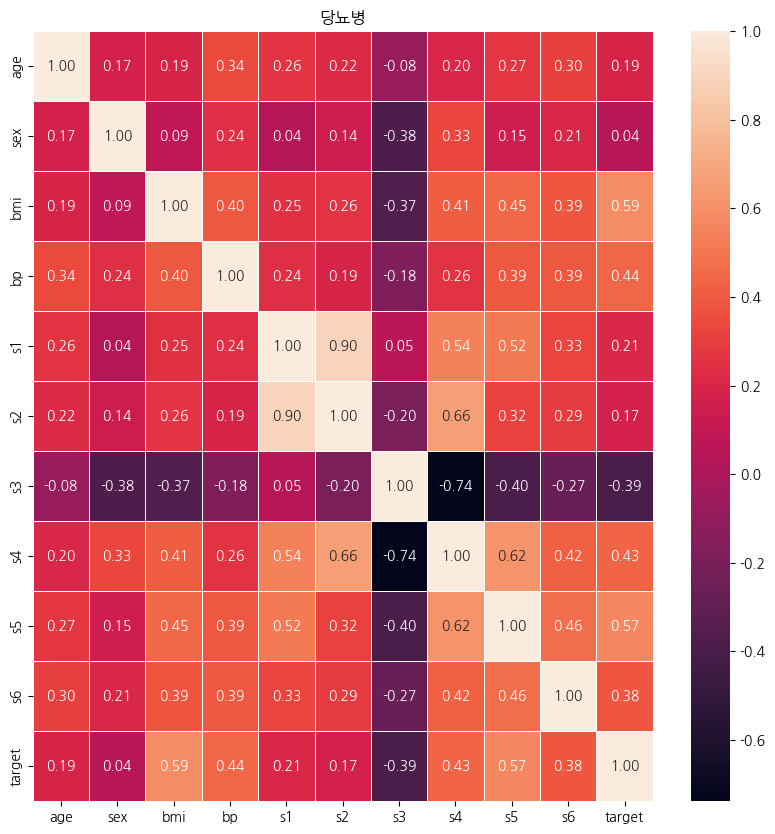

In [10]:
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,linewidths=0.5,fmt='.2f',annot=True)
plt.title('당뇨병')
plt.show()

### 데이터 전처리

In [11]:
data_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [13]:
features_data_df = data_df[['bmi','bp', 's5', 's3']]
features_data_df

,bmi,bp,s5,s3
0,32.1,101.00,4.8598,38.0
1,21.6,87.00,3.8918,70.0
2,30.5,93.00,4.6728,41.0
3,25.3,84.00,4.8903,40.0
4,23.0,101.00,4.2905,52.0
...,...,...,...,...
437,28.2,112.00,4.9836,42.0
438,24.9,75.00,4.4427,42.0
439,24.9,99.67,4.1271,43.0
440,30.0,95.00,5.1299,42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1deca733e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1dedd5a23d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1deca733bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x1dedd5a2910>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dedd5a2bb0>,
 'means': []}

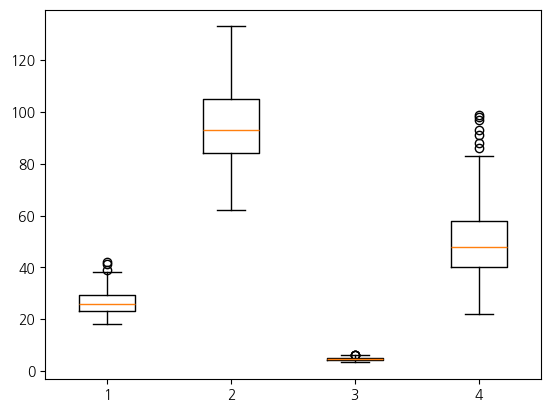

In [30]:
plt.boxplot(features_data_df)

In [ ]:
scalers=[]

In [14]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_data_df,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=10)

In [17]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (309, 4),2D
y_train : (309,),1D
X_test : (133, 4),2D
y_test : (133,),1D


In [18]:
### 데이터 스케일링 하기
from sklearn.preprocessing import MinMaxScaler

In [19]:
# 스케일링 인스턴스 생성
mmScaler = MinMaxScaler()

In [20]:
# 스케일링 하기
mmScaler.fit(X_train)

MinMaxScaler()

In [21]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.75103734, -0.87323944, -1.33939858, -0.28571429]),
 array([0.04149378, 0.01408451, 0.38306838, 0.01298701]),
 array([18.1   , 62.    ,  3.4965, 22.    ]),
 array([ 42.2  , 133.   ,   6.107,  99.   ]))

In [22]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

### 모델 만들기

In [23]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [24]:
scores = {}
for k in range(1,neigh.n_samples_fit_+1):
    neigh.n_neighbors = k
    score = neigh.score(X_test_scaled,y_test)
    scores[k] = score
scores

{1: -0.06797182321900097,
 2: 0.16716944664090305,
 3: 0.3409221697250089,
 4: 0.3955907691611379,
 5: 0.41267676292542876,
 6: 0.4148349396135328,
 7: 0.44244484703727605,
 8: 0.4556592010323328,
 9: 0.47461199347680516,
 10: 0.4791478922386022,
 11: 0.47591172184464525,
 12: 0.47333575592255694,
 13: 0.46908547290876434,
 14: 0.4760277452721806,
 15: 0.4742908034789618,
 16: 0.4692033267097395,
 17: 0.4805690432479608,
 18: 0.4837446582688679,
 19: 0.48952809021622246,
 20: 0.4848585805155632,
 21: 0.4844208788058191,
 22: 0.48536473719413054,
 23: 0.4859992070678285,
 24: 0.480960746674976,
 25: 0.47665322582273484,
 26: 0.48694702606742013,
 27: 0.48153930208028173,
 28: 0.47973026572862665,
 29: 0.48096520955413913,
 30: 0.47485177856409744,
 31: 0.477659823843654,
 32: 0.48400856577221973,
 33: 0.47984997959375575,
 34: 0.48394185860415395,
 35: 0.4869367818547302,
 36: 0.48618687728327226,
 37: 0.4835219495499573,
 38: 0.4852782235467623,
 39: 0.4878753755228131,
 40: 0.48771343

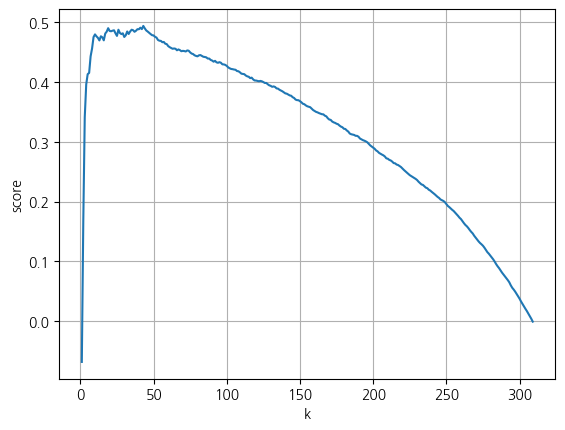

In [25]:
# 그래프로 시각화
plt.plot(scores.keys(),scores.values())
plt.grid()
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [26]:
best_k=sorted(scores.items(), key = lambda x:x[1],reverse=True)[0][0]
best_k

43

In [27]:
neigh.score(X_test_scaled,y_test)

-0.0006375546329371318

In [28]:
neigh.n_neighbors = best_k

In [29]:
neigh.score(X_test_scaled,y_test)

0.49330456789537425